# ML Answers

- **Answer Set**: No. 03
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

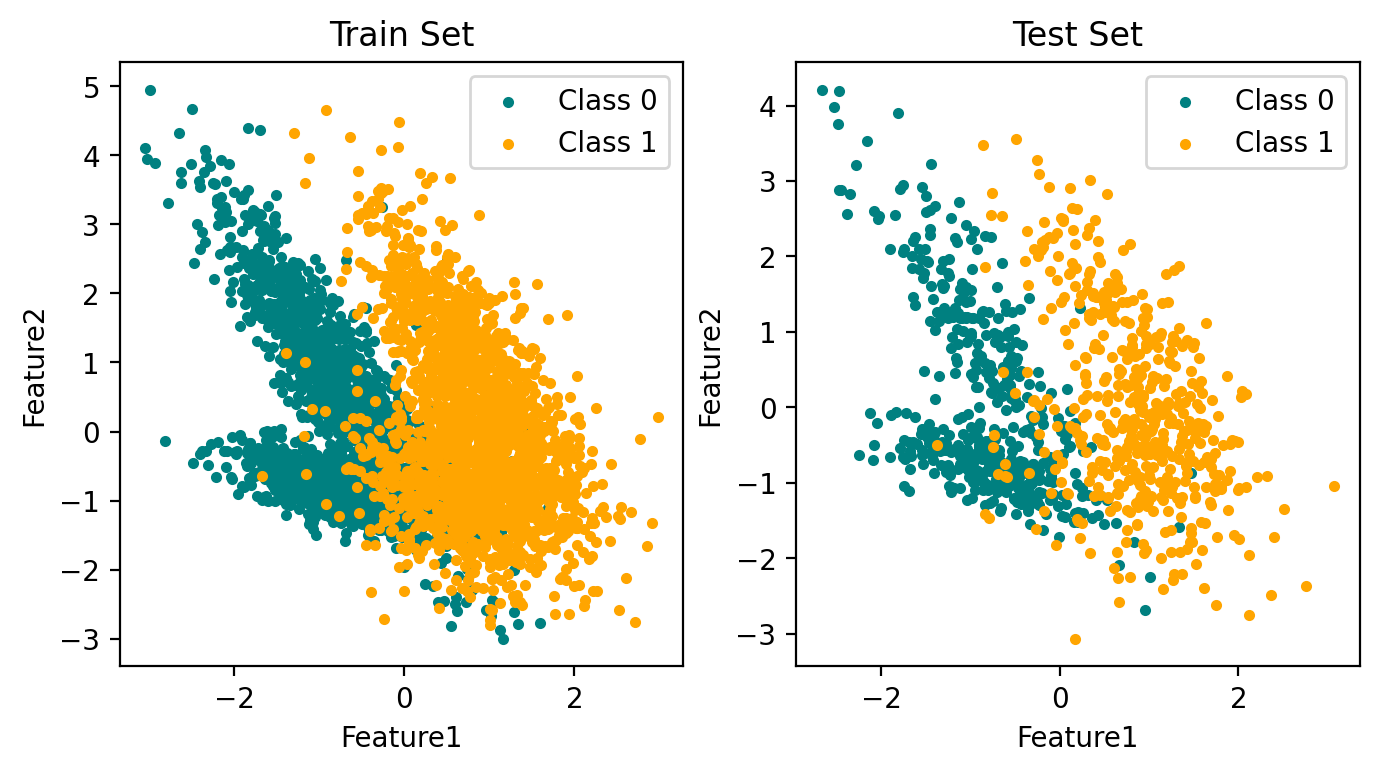

In [16]:
train_set = np.loadtxt("../lib/train.csv", delimiter=',', skiprows=1)
test_set = np.loadtxt("../lib/test.csv", delimiter=',', skiprows=1)

train_features = train_set[:, :-1]
train_labels = train_set[:, -1]
train_labels[train_labels == 0] = -1
train_class_0 = np.array([
    train_features[i] for i in range(len(train_labels)) if train_labels[i] == -1
]).T
train_class_1 = np.array([
    train_features[i] for i in range(len(train_labels)) if train_labels[i] == 1
]).T

test_features = test_set[:, :-1]
test_labels = test_set[:, -1]
test_labels[test_labels == 0] = -1
test_class_0 = np.array([
    test_features[i] for i in range(len(test_labels)) if test_labels[i] == -1
]).T
test_class_1 = np.array([
    test_features[i] for i in range(len(test_labels)) if test_labels[i] == 1
]).T

fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(train_class_0[0], train_class_0[1], label="Class 0", marker=".", c="teal")
ax1.scatter(train_class_1[0], train_class_1[1], label="Class 1", marker=".", c="orange")
ax1.set_title("Train Set")
ax1.set_xlabel("Feature1")
ax1.set_ylabel("Feature2")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(test_class_0[0], test_class_0[1], label="Class 0", marker=".", c="teal")
ax2.scatter(test_class_1[0], test_class_1[1], label="Class 1", marker=".", c="orange")
ax2.set_title("Test Set")
ax2.set_xlabel("Feature1")
ax2.set_ylabel("Feature2")
ax2.legend()

plt.show()

### Standardize

Now, we standardize our train, test features:

$$
\begin{aligned}
    & X_{standard} = \frac{X - \mu(X)}{\sqrt{Var(X)}}
\end{aligned}
$$

In [17]:
train_features = (train_features - np.mean(train_features)) / np.std(train_features)
test_features = (test_features - np.mean(test_features)) / np.std(test_features)

### Features Function

A useful function, that generates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree:

In [18]:
def features_matrix(features, degree):
    features = features.T
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result).T

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem (1)

### (1)

First we find the `Mean` ($\mu_i$) of each class:

$$
\begin{aligned}
    & \mu_1 = \frac{(
        \begin{bmatrix}0 \\ -1\end{bmatrix} +
        \begin{bmatrix}1 \\ 0\end{bmatrix} +
        \begin{bmatrix}2 \\ 1\end{bmatrix}
    )}{3} = \begin{bmatrix}1 \\ 0\end{bmatrix}
    \\
    \\
    & \mu_2 = \frac{(
        \begin{bmatrix}1 \\ 1\end{bmatrix} +
        \begin{bmatrix}-1 \\ 1\end{bmatrix} +
        \begin{bmatrix}-1 \\ -1\end{bmatrix} +
        \begin{bmatrix}-1 \\ -1\end{bmatrix}
    )}{4} = \begin{bmatrix}-0.5 \\ 0\end{bmatrix}
\end{aligned}
$$

### (2)

Now we find the `Within-Class Scatter Matrix` ($S_W$):

$$
\begin{aligned}
    & S_W = S_1 + S_2
    \\
    & S_1 = \sum_{x^{(i)} \in C_1} (x^{(i)} - \mu_1)(x^{(i)} - \mu_1)^T
    \\
    & S_2 = \sum_{x^{(i)} \in C_2} (x^{(i)} - \mu_2)(x^{(i)} - \mu_2)^T
    \\
    \\
    & S_W = \begin{bmatrix}
        5 & 4 \\
        4 & 6
    \end{bmatrix}
\end{aligned}
$$

### (3)

Now we find the `Between-Class Scatter Matrix` ($S_B$):

$$
\begin{aligned}
    & S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T
    \\
    \\
    & S_B = \begin{bmatrix}
        \frac{9}{4} & 0 \\
        0 & 0
    \end{bmatrix}
\end{aligned}
$$

### (4)

Now we find the `Maximum Eigen Vector` of matrix $S_W^{-1} S_B$:

$$
\begin{aligned}
    & S_W^{-1} S_B = \begin{bmatrix}
        0.96 & 0 \\
        -0.64 & 0
    \end{bmatrix}
    \\
    & Eigvals(S_W^{-1} S_B) = \begin{bmatrix}0 \\ \frac{27}{28}\end{bmatrix}
    \\
    \\
    & V_{Max} = \begin{bmatrix}1 \\ -0.55\end{bmatrix}
\end{aligned}
$$

### Reduce Function

This method, will use the `LDA` method for reducing the dimensions of features:

### Results

As we can see, **LD1** vector is equals to the `Maximum Eigen Vector` which is $\begin{bmatrix}1 \\ -0.55\end{bmatrix}$.

---

## Problem (2)

In this section, we will use the previously defined `Perceptron` model:

### Predict Function

First, we define the **Perceptron** predict function using **Step Function**:

In [19]:
def predict_function(weights, features):
    return np.heaviside(features @ weights, 1) * 2 - 1

### Accuracy Function

Next, we define the **Accuracy Function**:

In [20]:
def accuracy_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs < 0] = 0

    return np.sum(costs) / len(features)

### Gradient Function

Next, we define the **Gradient Function**:

$$
\begin{aligned}
    & \frac{\partial J(\Theta)}{\partial \Theta} = X Y
\end{aligned}
$$

In [21]:
def gradient_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs > 0] = 0
    costs[costs < 0] = 1

    return -(costs * features * labels)[0]

### Train Function

Now, we use the iterative stochastic gradient descent algorithm for computing the weights:

$$
\begin{aligned}
    & \Theta_{i} = \Theta_{i-1} - \alpha.\frac{\partial J(\Theta)}{\partial \Theta}
\end{aligned}
$$

In [22]:
def train_model(features, labels, learning_rate=0.001, epoch_count=1000, batch_size=1):
    data_set = np.append(features, np.array([labels]).T, 1)
    weights = np.ones(len(features[0]))
    history = np.zeros(epoch_count)

    for epoch in range(epoch_count):
        np.random.shuffle(data_set)

        batches = [
            data_set[batch * batch_size : (batch + 1) * batch_size]
            for batch in range(int(len(data_set) / batch_size))
        ]

        weights_temp = weights
        for batch in batches:
            gradient = gradient_function(weights_temp, batch[:, :-1], batch[:, -1])
            weights_temp = weights_temp - learning_rate * gradient

        accuracy_temp = accuracy_function(weights_temp, data_set[:, :-1], data_set[:, -1])
        accuracy = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])
        if (accuracy_temp > accuracy):
            weights = weights_temp

        history[epoch] = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])

    return (weights, history)

### Reduce Function

This method, will use the `LDA` method for finding the $LD1$ component:

In [27]:
# Find the LD1 component
def find_ld1(features, labels):
    class_0 = np.array([
        features[i] for i in range(len(labels)) if labels[i] == -1
    ]).T
    class_1 = np.array([
        features[i] for i in range(len(labels)) if labels[i] == 1
    ]).T

    mean_0 = np.mean(class_0, axis=1).reshape(-1, 1)
    mean_1 = np.mean(class_1, axis=1).reshape(-1, 1)

    s1 = (class_0 - mean_0) @ (class_0 - mean_0).T
    s2 = (class_1 - mean_1) @ (class_1 - mean_1).T

    sw = s1 + s2
    sb = (mean_0 - mean_1) @ (mean_0 - mean_1).T

    values, matrix = np.linalg.eig(np.linalg.inv(sw) @ sb)

    return matrix[np.argmax(values)].reshape(-1, 1)

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

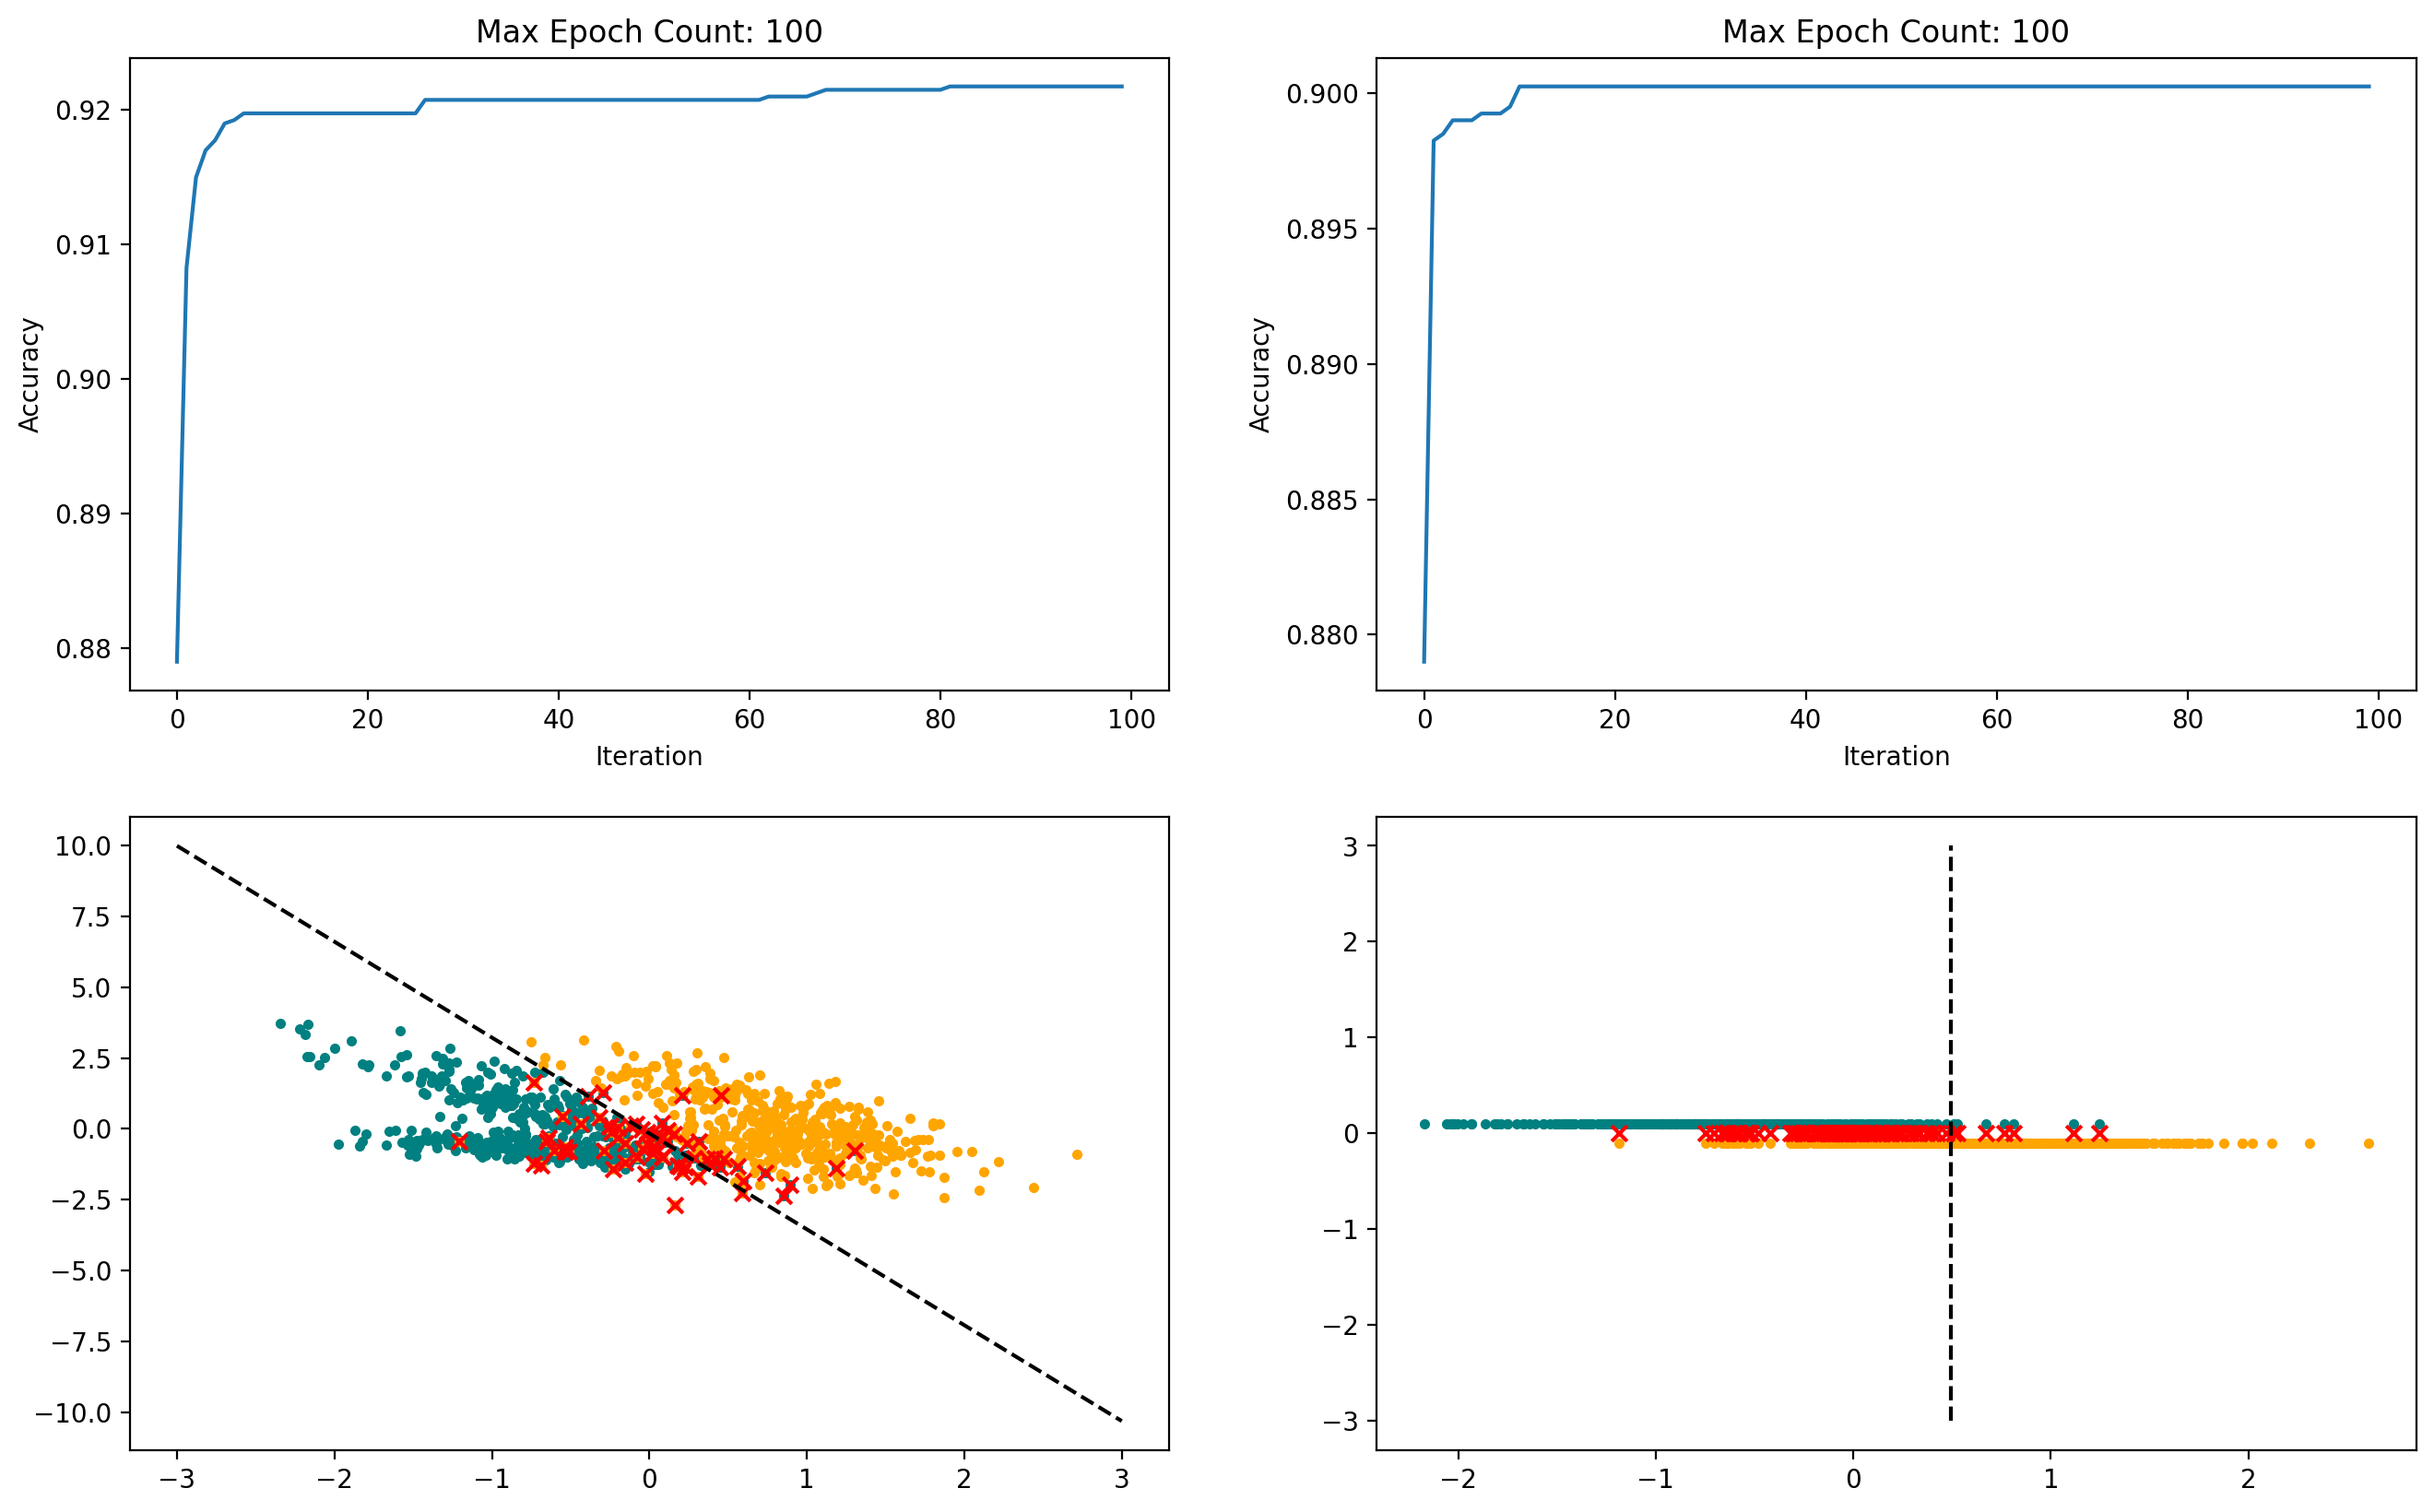

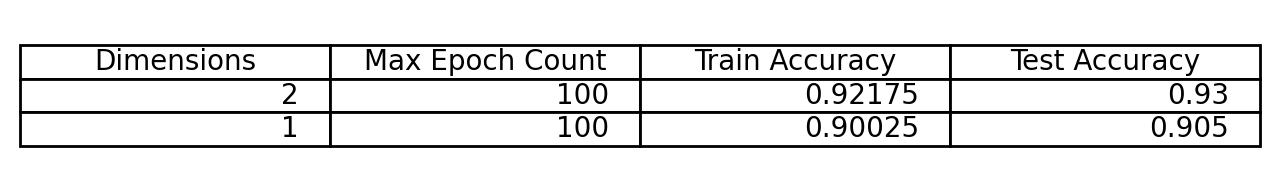

In [51]:
def plot(figure, index, dimensions, tests, weights, history):
    # Plot accuracy history
    axis = figure.add_subplot(2, 2, index)
    axis.plot(range(0, len(history)), history)
    axis.set_title(f"Max Epoch Count: {100}")
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Accuracy")

    # Plot test set and trained line
    test_predicts = predict_function(weights, features_matrix(tests, 1))
    test_class_0 = np.array([
        tests[i] for i in range(len(tests)) if test_labels[i] == -1
    ]).T
    test_class_1 = np.array([
        tests[i] for i in range(len(tests)) if test_labels[i] == 1
    ]).T
    test_class_incorrect = np.array([
        tests[i] for i in range(len(tests)) if test_labels[i] != test_predicts[i]
    ]).T

    # Plot data records and classifier line and incorrect classified records
    if (dimensions == 2):
        axis = fig.add_subplot(2, 2, 2 + index)
        axis.scatter(test_class_0[0], test_class_0[1], label="Class 0", marker=".", c="teal")
        axis.scatter(test_class_1[0], test_class_1[1], label="Class 1", marker=".", c="orange")
        axis.scatter(test_class_incorrect[0], test_class_incorrect[1], label="Class Incorrect", marker="x", c="red")
        x = np.linspace(-3, 3, 1000)
        f = lambda x: (-weights[1] * x - weights[0]) / weights[2]
        axis.plot(x, f(x), color='black', ls='--')
    else:
        axis = fig.add_subplot(2, 2, 2 + index)
        axis.scatter(test_class_0[0], np.zeros(len(test_class_0[0])) + 0.1, label="Class 0", marker=".", c="teal")
        axis.scatter(test_class_1[0], np.zeros(len(test_class_1[0])) - 0.1, label="Class 1", marker=".", c="orange")
        axis.scatter(test_class_incorrect[0], np.zeros(len(test_class_incorrect[0])), label="Class Incorrect", marker="x", c="red")
        y = np.linspace(-3, 3, 1000)
        x = np.zeros(len(y)) + weights[1]
        axis.plot(x, y, color='black', ls='--')

fig = plt.figure(figsize=(16, 10), dpi=200)

# Classify without reducing dimensions
(weights_vanila, history_vanila) = train_model(
    features_matrix(train_features, 1),
    train_labels,
    epoch_count=100
)
plot(fig, 1, 2, test_features, weights_vanila, history_vanila)

# Classify using LD1 component
ld1 = find_ld1(train_features, train_labels)
(weights_lda, history_lda) = train_model(
    features_matrix(train_features @ ld1, 1),
    train_labels,
    epoch_count=100
)
plot(fig, 2, 1, test_features @ ld1, weights_lda, history_lda)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=[
    [
        "2", "100",
        accuracy_function(weights_vanila, features_matrix(train_features, 1), train_labels),
        accuracy_function(weights_vanila, features_matrix(test_features, 1), test_labels)
    ],
    [
        "1", "100",
        accuracy_function(weights_lda, features_matrix(train_features @ ld1, 1), train_labels),
        accuracy_function(weights_lda, features_matrix(test_features @ ld1, 1), test_labels)
    ],
], colLabels=["Dimensions", "Max Epoch Count", "Train Accuracy", "Test Accuracy"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the model accuracy with 100 iterations without any dimensionality reduction is about `0.93`, but when we reduce dimensions using $LD1$ component, the accuracy reduced to `0.90`

---

## Problem (3)

### (1)

The general formula for `Within-Class Scatter Matrix` ($S_W$) is:

$$
\begin{aligned}
    & S_W = S_1 + S_2 + \dots + S_n
    \\
    & S_1 = \sum_{x^{(i)} \in C_1} (x^{(i)} - \mu_1)(x^{(i)} - \mu_1)^T
    \\
    & S_2 = \sum_{x^{(i)} \in C_2} (x^{(i)} - \mu_2)(x^{(i)} - \mu_2)^T
    \\
    & \vdots
    \\
    & S_n = \sum_{x^{(i)} \in C_n} (x^{(i)} - \mu_n)(x^{(i)} - \mu_n)^T
\end{aligned}
$$

The general formula for `Between-Class Scatter Matrix` ($S_B$) is:

$$
\begin{aligned}
    & S_B = M_1 + M_2 + \dots + M_n
    \\
    & M_1 = (\mu_1 - \mu)(\mu_1 - \mu)^T
    \\
    & M_2 = (\mu_2 - \mu)(\mu_2 - \mu)^T
    \\
    & \vdots
    \\
    & M_n = (\mu_n - \mu)(\mu_n - \mu)^T
    \\
    & \mu = \texttt{Mean of entire data records}
\end{aligned}
$$

### (2)

Now we can define the cost function $J(w)$ using the general forms of $S_W$ and $S_B$:

$$
\begin{aligned}
    & J(w) = \frac{w^T S_B w}{w^T S_W w}
\end{aligned}
$$

### (3)

Now we want to find the $argmax$ of $J(w)$, result vector is $LD1$ component:

$$
\begin{aligned}
    & LD1 = \underset{w}{argmax}(J(w) = \frac{w^T S_B w}{w^T S_W w})
\end{aligned}
$$

Inorder to solve the above equation, we use **Quotient Rayleigh** and find the eigen vectors of $S_W^{-1} S_B$ matrix:

$$
\begin{aligned}
    & Vectors = EigenVectors(S_W^{-1} S_B)
    \\
    & LD1 = Max(Vectors)
\end{aligned}
$$

---